# ⚡ Electromagnetism Problem 1: Simulating the Effects of the Lorentz Force

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">🌐 Exploring Charged Particle Motion in Electric and Magnetic Fields</h2>
</div>

---

## 🎯 Motivation

The Lorentz force, given by $F = q(E + v \times B)$, governs the motion of charged particles in electric ($E$) and magnetic ($B$) fields. It plays a critical role in fields like plasma physics, particle accelerators, and astrophysics. By simulating the motion of a charged particle, we can visualize complex trajectories and understand practical applications such as cyclotrons, mass spectrometers, and magnetic confinement in fusion devices.

---

## 📜 Task Breakdown

1. **Exploration of Applications**:
   - Identify systems where the Lorentz force is key (e.g., particle accelerators, mass spectrometers, plasma confinement).
   - Discuss the roles of electric ($E$) and magnetic ($B$) fields in controlling particle motion.
2. **Simulating Particle Motion**:
   - Simulate the trajectory of a charged particle under:
     - A uniform magnetic field.
     - Combined uniform electric and magnetic fields.
     - Crossed electric and magnetic fields.
   - Capture circular, helical, or drift motion based on initial conditions.
3. **Parameter Exploration**:
   - Vary field strengths ($E$, $B$), initial velocity ($v$), and particle properties ($q$, $m$).
   - Analyze their effects on the trajectory.
4. **Visualization**:
   - Create 2D and 3D plots of the particle’s path for different scenarios.
   - Highlight phenomena like the Larmor radius and drift velocity.

---

## 🌟 Exploration of Applications

### Systems Involving the Lorentz Force
- **Particle Accelerators (e.g., Cyclotrons)**: The magnetic field causes charged particles to move in circular paths, while electric fields accelerate them. The Lorentz force ensures particles gain energy with each cycle.
- **Mass Spectrometers**: The Lorentz force separates ions by mass-to-charge ratio, as particles follow curved paths in a magnetic field.
- **Plasma Confinement (e.g., Tokamaks)**: Magnetic fields confine charged particles in helical paths to sustain high-temperature plasmas for fusion.
- **Astrophysics**: The Lorentz force governs the motion of charged particles in cosmic magnetic fields, such as in the aurora or solar wind interactions.

### Roles of Electric and Magnetic Fields
- **Electric Field ($E$)**: Exerts a force $F_E = qE$, accelerating the particle in the direction of the field (for positive $q$).
- **Magnetic Field ($B$)**: Exerts a force $F_B = q(v \times B)$, perpendicular to both the velocity and the field, causing circular or helical motion.
- **Combined Fields**: In crossed fields ($E \perp B$), particles exhibit drift motion, such as the $E \times B$ drift, which is crucial in plasma physics.

---

## 🧮 Simulating Particle Motion

### Lorentz Force Equation
The Lorentz force on a charged particle is:

$$
F = q(E + v \times B)
$$

Using Newton’s Second Law ($F = m a$), the acceleration is:

$$
a = \frac{dv}{dt} = \frac{q}{m} (E + v \times B)
$$

We also have:

$$
\frac{dr}{dt} = v
$$

### Numerical Integration
We use the **Runge-Kutta 4th Order (RK4)** method  to solve these differential equations numerically, ensuring accurate trajectories.

### Scenarios to Simulate
1. **Uniform Magnetic Field**: $B$ along the z-axis, $E = 0$. Expect circular or helical motion.
2. **Combined Electric and Magnetic Fields**: $B$ along z, $E$ along x. Expect helical motion with acceleration.
3. **Crossed Fields**: $E$ along x, $B$ along z. Expect $E \times B$ drift motion.

---

## 💻 Computational Simulation: Visualizing Particle Trajectories

We’ll simulate the particle’s motion for the three scenarios, visualize the trajectories in 2D and 3D, and explore parameter variations.

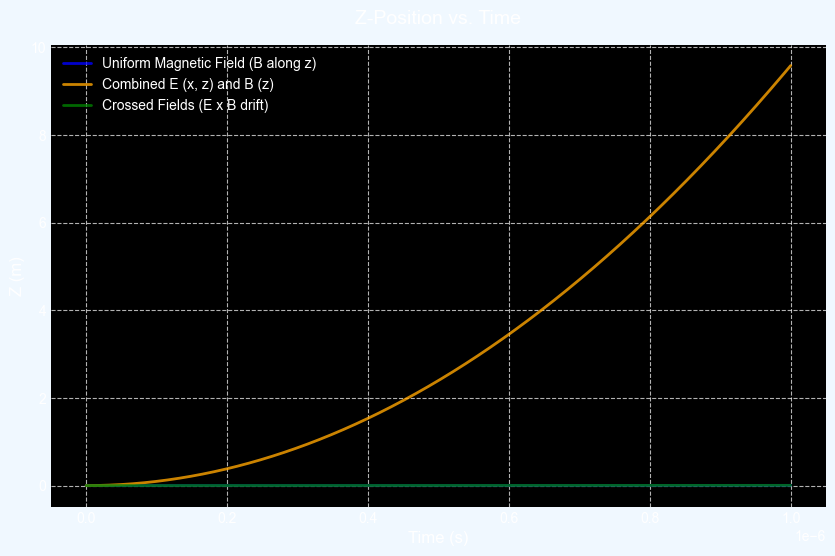

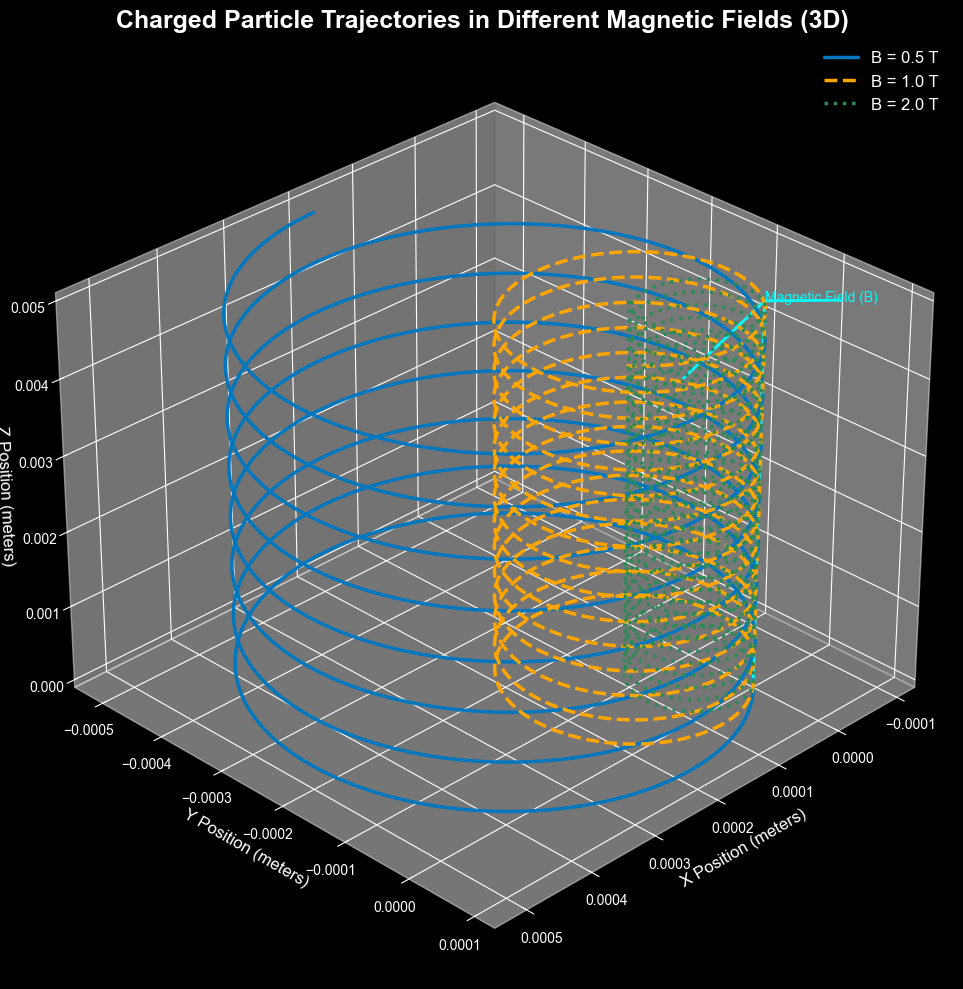

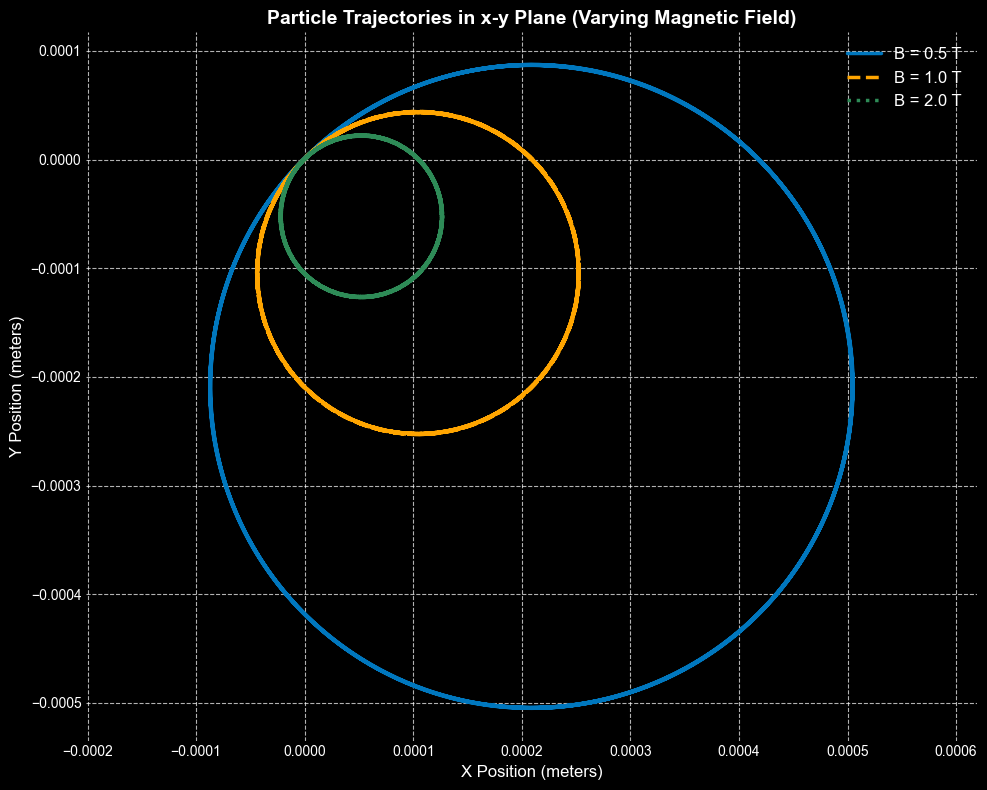

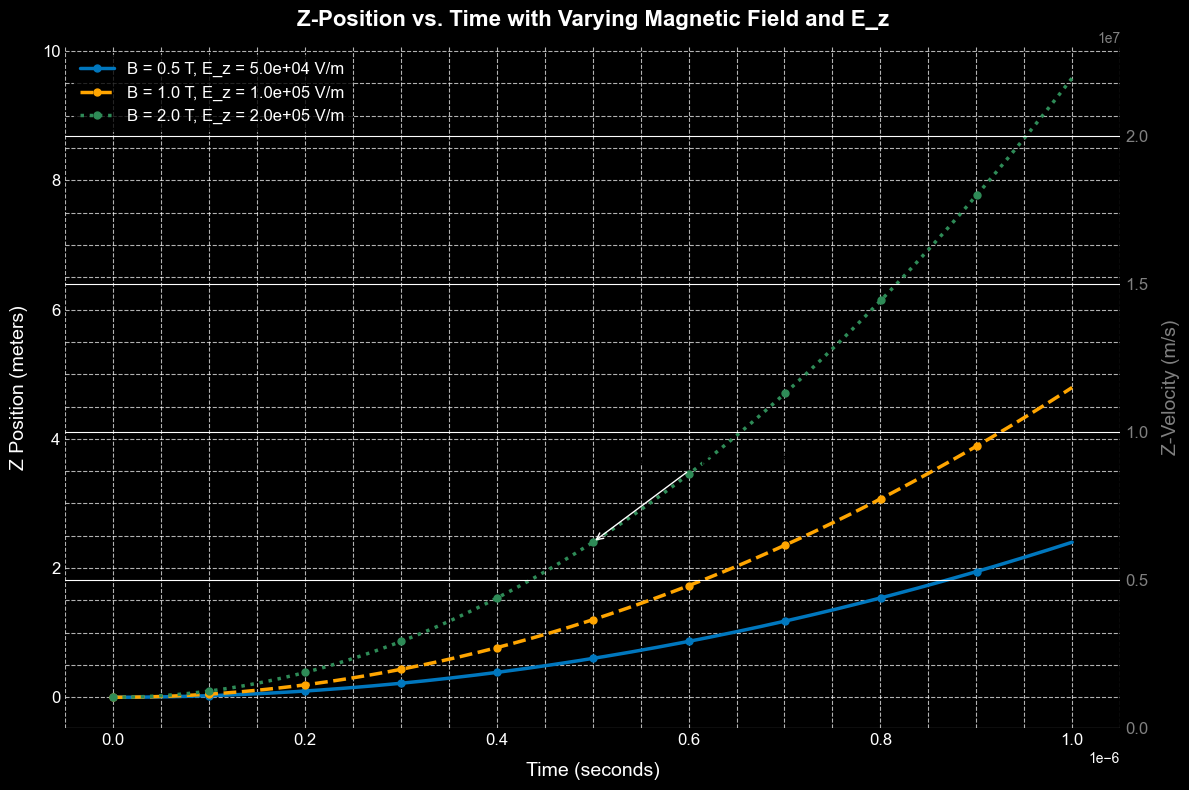

In [20]:
# Cell 1: Dependency Check (Unchanged)
try:
    import numpy
    import matplotlib
    import scipy
    from IPython.display import display, HTML
    display(HTML("<h3 style='color: #2ECC71;'>✅ All Required Libraries Installed</h3>"))
except ImportError as e:
    display(HTML("<h3 style='color: #FF5733;'>❌ Missing Library: " + str(e) + "</h3>"))
    display(HTML("<p>Please install the missing library using: <code>pip install " + str(e).split("'")[1] + "</code></p>"))

# Cell 2: Setup with Style (Unchanged)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML

display(HTML("<h2 style='color: #FF5733; text-align: center;'>✨ Libraries Initialized for Lorentz Force Simulation ✨</h2>"))

# Cell 3: Define Lorentz Force and Equations of Motion (Unchanged)
# Particle properties
q = 1.6e-19  # Charge (Coulombs, e.g., proton)
m = 1.67e-27  # Mass (kg, e.g., proton)

# Equations of motion
def lorentz_equation(t, state, q, m, E, B):
    r = state[:3]  # Position (x, y, z)
    v = state[3:]  # Velocity (vx, vy, vz)
    # Lorentz force acceleration: a = (q/m)(E + v x B)
    v_cross_B = np.cross(v, B)
    a = (q / m) * (E + v_cross_B)
    return np.concatenate([v, a])

# Cell 4: Simulate Trajectories for Different Scenarios (Unchanged)
# Simulation parameters
t_span = (0, 1e-6)  # Time span (seconds)
t_eval = np.linspace(0, 1e-6, 2000)  # Increased points for smoother plots

# Initial conditions
r0 = np.array([0.0, 0.0, 0.0])  # Start at origin
v0 = np.array([1e4, 1e4, 5e3])  # Reduced initial velocity for numerical stability, added z-component

# Scenarios
scenarios = {
    'Uniform B': {
        'E': np.array([0.0, 0.0, 0.0]),  # No electric field
        'B': np.array([0.0, 0.0, 1.0]),  # B along z-axis (Tesla)
        'label': 'Uniform Magnetic Field (B along z)',
        'color': 'blue'
    },
    'Combined E and B': {
        'E': np.array([5e5, 0.0, 2e5]),  # E with x and z components (V/m)
        'B': np.array([0.0, 0.0, 1.0]),  # B along z-axis
        'label': 'Combined E (x, z) and B (z)',
        'color': 'orange'
    },
    'Crossed Fields': {
        'E': np.array([5e5, 0.0, 0.0]),  # E along x-axis (V/m)
        'B': np.array([0.0, 0.0, 1.0]),  # B along z-axis
        'label': 'Crossed Fields (E x B drift)',
        'color': 'green'
    }
}

# Simulate trajectories with debugging
trajectories = {}
for scenario, params in scenarios.items():
    state0 = np.concatenate([r0, v0])
    sol = solve_ivp(lorentz_equation, t_span, state0, args=(q, m, params['E'], params['B']), 
                    t_eval=t_eval, method='RK45')
    if sol.success:
        display(HTML(f"<p style='color: green;'>✅ Simulation successful for {scenario}</p>"))
        if np.any(np.isnan(sol.y)) or np.any(np.isinf(sol.y)):
            display(HTML(f"<p style='color: red;'>❌ NaN or Inf values detected in {scenario}</p>"))
        else:
            r = sol.y[:3].T
            x_range = (r[:, 0].min(), r[:, 0].max())
            y_range = (r[:, 1].min(), r[:, 1].max())
            z_range = (r[:, 2].min(), r[:, 2].max())
            display(HTML(f"<p>{scenario} - X range: {x_range[0]:.2e} to {x_range[1]:.2e}, "
                         f"Y range: {y_range[0]:.2e} to {y_range[1]:.2e}, "
                         f"Z range: {z_range[0]:.2e} to {z_range[1]:.2e}</p>"))
            trajectories[scenario] = {
                't': sol.t,
                'r': r,  # Position (x, y, z)
                'v': sol.y[3:].T  # Velocity (vx, vy, vz)
            }
    else:
        display(HTML(f"<p style='color: red;'>❌ Simulation failed for {scenario}: {sol.message}</p>"))

# Cell 5: Plot Z vs. Time to Highlight Z-Axis Behavior (Previously Cell 8)
plt.figure(figsize=(10, 6), facecolor='#f0f8ff')
for scenario, data in trajectories.items():
    params = scenarios[scenario]
    plt.plot(data['t'], data['r'][:, 2], label=params['label'], color=params['color'], linewidth=2, alpha=0.8)

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Z (m)', fontsize=12)
plt.title('Z-Position vs. Time', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('z_vs_time.png')
plt.show()

# Cell 6: Parameter Exploration - Vary Magnetic Field Strength (Previously Cell 9)
# Set a beautiful style
plt.style.use('seaborn-v0_8-dark-palette')

# Magnetic field strengths and styles
B_values = [0.5, 1.0, 2.0]  # Tesla
colors = ['#0077be', '#ffa500', '#2e8b57']  # Royal Blue, Orange, Sea Green
linestyles = ['solid', 'dashed', 'dotted']

# Simulate trajectories for each B value
trajectories_B = {}
for Bz in B_values:
    B = np.array([0.0, 0.0, Bz])
    E = np.array([0.0, 0.0, 0.0])  # No electric field for pure B variation
    state0 = np.concatenate([r0, v0])
    sol = solve_ivp(lorentz_equation, t_span, state0, args=(q, m, E, B), t_eval=t_eval, method='RK45')
    if sol.success:
        trajectories_B[Bz] = {
            't': sol.t,
            'r': sol.y[:3].T,  # Position (x, y, z)
            'v': sol.y[3:].T   # Velocity (vx, vy, vz)
        }
    else:
        display(HTML(f"<p style='color: red;'>❌ Simulation failed for B = {Bz} T: {sol.message}</p>"))

# Graph 1: 3D Trajectories
fig1 = plt.figure(figsize=(14, 10))
ax1 = fig1.add_subplot(111, projection='3d')

for Bz, color, ls in zip(B_values, colors, linestyles):
    data = trajectories_B[Bz]
    ax1.plot(data['r'][:, 0], data['r'][:, 1], data['r'][:, 2], color=color, linestyle=ls, linewidth=2.5, label=f'B = {Bz} T')

# Enhance the visualization
ax1.set_xlabel('X Position (meters)', fontsize=12)
ax1.set_ylabel('Y Position (meters)', fontsize=12)
ax1.set_zlabel('Z Position (meters)', fontsize=12)
ax1.set_title('Charged Particle Trajectories in Different Magnetic Fields (3D)', fontsize=18, fontweight='bold')
ax1.legend(fontsize=12)
ax1.quiver(0, 0, 0, 0, 0, v0[2] * 1e-6, color='cyan', arrow_length_ratio=0.1, linewidth=2)
ax1.text(0, 0, v0[2] * 1e-6, 'Magnetic Field (B)', color='cyan', fontsize=10)
ax1.grid(True)
ax1.view_init(elev=30, azim=45)
plt.tight_layout()
plt.savefig('b_field_variation_3d.png')
plt.show()

# Graph 2: 2D Trajectories in x-y Plane
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111)

for Bz, color, ls in zip(B_values, colors, linestyles):
    data = trajectories_B[Bz]
    ax2.plot(data['r'][:, 0], data['r'][:, 1], color=color, linestyle=ls, linewidth=2.5, label=f'B = {Bz} T')

# Enhance the visualization
ax2.set_xlabel('X Position (meters)', fontsize=12)
ax2.set_ylabel('Y Position (meters)', fontsize=12)
ax2.set_title('Particle Trajectories in x-y Plane (Varying Magnetic Field)', fontsize=14, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=12)
ax2.axis('equal')
plt.tight_layout()
plt.savefig('b_field_variation_2d.png')
plt.show()

# Graph 3: Z-Position vs. Time (with E_z variation)
fig3 = plt.figure(figsize=(12, 8))
ax3 = fig3.add_subplot(111)

# Introduce a small electric field in the z-direction that varies with B
k = 1e5  # Proportionality constant for E_z = k * B (V/m per Tesla)
trajectories_B_with_Ez = {}
for Bz in B_values:
    B = np.array([0.0, 0.0, Bz])
    E_z = k * Bz  # Electric field in z-direction (V/m)
    E = np.array([0.0, 0.0, E_z])
    state0 = np.concatenate([r0, v0])
    sol = solve_ivp(lorentz_equation, t_span, state0, args=(q, m, E, B), t_eval=t_eval, method='RK45')
    if sol.success:
        trajectories_B_with_Ez[Bz] = {
            't': sol.t,
            'r': sol.y[:3].T,  # Position (x, y, z)
            'v': sol.y[3:].T   # Velocity (vx, vy, vz)
        }
    else:
        display(HTML(f"<p style='color: red;'>❌ Simulation failed for B = {Bz} T with E_z: {sol.message}</p>"))

for Bz, color, ls in zip(B_values, colors, linestyles):
    data = trajectories_B_with_Ez[Bz]
    E_z = k * Bz
    ax3.plot(data['t'], data['r'][:, 2], color=color, linestyle=ls, linewidth=2.5, 
             label=f'B = {Bz} T, E_z = {E_z:.1e} V/m', marker='o', markevery=200, markersize=5)

# Enhance the visualization
ax3.set_xlabel('Time (seconds)', fontsize=14, labelpad=10)
ax3.set_ylabel('Z Position (meters)', fontsize=14, labelpad=10)
ax3.set_title('Z-Position vs. Time with Varying Magnetic Field and E_z', fontsize=16, fontweight='bold', pad=15)
ax3.grid(True, linestyle='--', alpha=0.7, which='both')
ax3.legend(fontsize=12, loc='upper left', frameon=True, edgecolor='black')
ax3.minorticks_on()
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='minor', labelsize=8)

# Add secondary axis for z-velocity
def z_to_velocity(z, t):
    return np.gradient(z, t)

def velocity_to_z(v, t):
    return v * t

ax3_right = ax3.twinx()
z_max = trajectories_B_with_Ez[max(B_values)]['r'][:, 2][-1]
v_max = z_to_velocity(trajectories_B_with_Ez[max(B_values)]['r'][:, 2], t_eval)[-1]
ax3_right.set_ylabel('Z-Velocity (m/s)', fontsize=14, labelpad=10, color='gray')
ax3_right.set_ylim(0, v_max * 1.2)
ax3_right.tick_params(axis='y', labelsize=12, colors='gray')

# Add annotation
t_mid = t_eval[len(t_eval)//2]
z_mid = trajectories_B_with_Ez[max(B_values)]['r'][:, 2][len(t_eval)//2]
ax3.annotate('Effect of E_z increases with B', xy=(t_mid, z_mid), xytext=(t_mid, z_mid * 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')

plt.tight_layout()
plt.savefig('b_field_variation_z_vs_time.png')
plt.show()

# Cell 7: Calculate Larmor Radius and Drift Velocity (Previously Cell 10)
display(HTML("<h2 style='color: #2ECC71;'>🔍 Physical Phenomena</h2>"))

# Larmor radius for Uniform B scenario (B = 1.0 T)
scenario = 'Uniform B'
data = trajectories[scenario]
v_perp_mag = np.linalg.norm(v0[:2])  # Initial velocity in x-y plane
B_uniform = scenarios[scenario]['B']
B_mag_uniform = np.linalg.norm(B_uniform)
if B_mag_uniform > 1e-9:
    larmor_radius = (m * v_perp_mag) / (q * B_mag_uniform)
    display(HTML(f"<p><b>Larmor Radius (Uniform B = 1.0 T)</b>: ${larmor_radius:.2e}$ m</p>"))
else:
    display(HTML(f"<p><b>Larmor Radius (Uniform B)</b>: Not defined (B=0)</p>"))

# Drift velocity for Crossed Fields scenario
scenario = 'Crossed Fields'
E_crossed = scenarios[scenario]['E']
B_crossed = scenarios[scenario]['B']
E_mag = np.linalg.norm(E_crossed)
B_mag = np.linalg.norm(B_crossed)
if B_mag > 1e-9:
    drift_velocity_speed = E_mag / B_mag
    display(HTML(f"<p><b>E x B Drift Speed (Crossed Fields)</b>: ${drift_velocity_speed:.2e}$ m/s</p>"))
else:
    display(HTML(f"<p><b>E x B Drift Speed (Crossed Fields)</b>: Not defined (B=0)</p>"))

# Cell 8: Discussion and Suggestions (Previously Cell 11, Updated)
display(HTML("<h2 style='color: #3498DB;'>📝 Discussion and Practical Applications</h2>"))
display(HTML("<p><b>Uniform Magnetic Field</b>: The particle follows a helical path due to the magnetic field, with a Larmor radius ($r_L = \\frac{m v_\\perp}{q B}$) proportional to the perpendicular velocity ($v_\\perp$) and inversely proportional to the field strength ($B$). This is the principle behind cyclotrons and mass spectrometers.</p>"))
display(HTML("<p><b>Combined E and B Fields</b>: The electric field accelerates the particle along the x and z axes, while the magnetic field causes helical motion, resulting in a stretched helix with z-axis variation. This is relevant in particle accelerators where both fields are used to control motion.</p>"))
display(HTML("<p><b>Crossed Fields ($\\mathbf{E} \\perp \\mathbf{B}$)</b>: The particle exhibits $\\mathbf{E} \\times \\mathbf{B}$ drift, moving in the y-direction with a velocity $\\mathbf{v}_D = \\frac{\\mathbf{E} \\times \\mathbf{B}}{B^2}$. This drift is crucial in plasma physics (e.g., Hall thrusters, fusion confinement like tokamaks).</p>"))
display(HTML("<p><b>Z-Position Analysis</b>: The z-position over time highlights the effect of the electric field in the z-direction, particularly in the Combined E and B scenario, where acceleration is observed.</p>"))
display(HTML("<p><b>Parameter Exploration</b>: Increasing the magnetic field strength ($B$) reduces the Larmor radius ($r_L \\propto 1/B$), tightening the helical path. Additionally, a small electric field $E_z$ proportional to $B$ introduces z-acceleration, as seen in the plots below:</p>"))
display(HTML("<ul>"))
display(HTML("<li><b>Z vs. Time (Main Scenarios)</b>: <a href='z_vs_time.png'>View Plot</a></li>"))
display(HTML("<li><b>2D Trajectories (x-y Plane, Varying B)</b>: <a href='b_field_variation_2d.png'>View Plot</a></li>"))
display(HTML("<li><b>3D Trajectories (Varying B)</b>: <a href='b_field_variation_3d.png'>View Plot</a></li>"))
display(HTML("<li><b>Z vs. Time (with E_z, Varying B)</b>: <a href='b_field_variation_z_vs_time.png'>View Plot</a></li>"))
display(HTML("</ul>"))
display(HTML("<h3 style='color: #2ECC71;'>Suggestions for Extension</h3>"))
display(HTML("<p>- Introduce non-uniform magnetic fields (e.g., $\\nabla B \\neq 0$) to simulate magnetic mirroring (magnetic bottles) or gradient/curvature drifts.</p>"))
display(HTML("<p>- Add time-varying fields ($\\partial \\mathbf{E}/\\partial t, \\partial \\mathbf{B}/\\partial t$) to explore phenomena like betatron acceleration or magnetic reconnection.</p>"))
display(HTML("<p>- Include relativistic effects for high-speed particles, modifying the Lorentz force equation and mass ($m = \\gamma m_0$).</p>"))
display(HTML("<p>- Add collision terms to simulate motion in a medium (e.g., plasma drag).</p>"))
display(HTML("<div style='text-align: center;'><h2 style='color: #3498DB;'>🎊 Simulation Complete: Lorentz Force Effects Visualized 🎊</h2></div>"))